# Wikipediaからの変換辞書作成

ここでは、Wikipedia Cirrusのダンプデータを用いて、単語とidの対応表を作成します。

利用するファイルは以下URLから取得できます。今回は`20180611`にダンプされたファイル`jawiki-20180611-cirrussearch-content.json.gz`を利用します。

[Index of /other/cirrussearch/](https://dumps.wikimedia.org/other/cirrussearch/)

In [1]:
%matplotlib inline
import json
import gzip

import yat
import pandas as pd
from tqdm import tqdm_notebook as tqdm

In [2]:
tokenizer = yat.Tokenizer()

with gzip.open("../trunk/jawiki-20180611-cirrussearch-content.json.gz") as f:
    for line in tqdm(f, total=2219228):
        json_line = json.loads(line)

        if "index" not in json_line:
            tokenizer.fit_on_text(json_line["text"])

## 統計情報


In [3]:
print("語彙数: ", tokenizer.word_index)

語彙数:  5705016


## 変換表の保存
今後この変換表を再利用するために、ファイルに書き出します。

In [4]:
tokenizer.save_as_text("wikipedia_all_tokens.tsv")

## 補足:EDA
せっかくなので、[言語処理100本ノック 2015](http://www.cl.ecei.tohoku.ac.jp/nlp100/)の「39. Zipfの法則」にあるZipf則を確認してみます。

In [5]:
df = pd.DataFrame([[k.surface, k.feature, v] for k, v in tokenizer.word_counts.items()],
                  columns=["surface", "feature", "count"])

In [6]:
df["rank"] = df["count"].rank(ascending=False).astype(int)

In [7]:
df.head()

,surface,feature,count,rank
0,ほう,感動詞,4642,15326
1,おう,動詞,8269,9811
2,座,名詞,89053,1156
3,（,記号,16276511,11
4,鳳凰,名詞,3454,19040


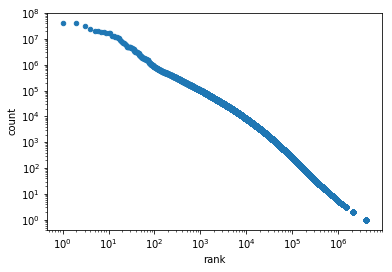

In [8]:
df.plot.scatter(x="rank", y="count", loglog=True)